In [55]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline


In [56]:
pwd

'/Users/joaocamargo/macHD/GITHUB/TCC-PUCRS-2020'

In [57]:
ls -ltr Data/

total 9424
-rw-r--r--  1 joaocamargo  staff  3301959 Apr 21 10:13 count_day_type.csv
-rw-r--r--  1 joaocamargo  staff   124920 Apr 21 10:13 count_day.csv
-rw-r--r--  1 joaocamargo  staff    24972 Apr 21 10:13 count_week_day_type.csv
-rw-r--r--  1 joaocamargo  staff      138 Apr 21 10:13 count_week_day.csv
-rw-r--r--  1 joaocamargo  staff   386439 Apr 21 10:13 count_year_month_type.csv
-rw-r--r--  1 joaocamargo  staff     4827 Apr 21 10:13 count_year_month.csv


In [58]:
df_count_day_type = pd.read_csv('./Data/count_day_type.csv',sep=",",encoding='ascii')
df_count_week_day_type = pd.read_csv('Data/count_week_day_type.csv',sep=",",encoding='ascii')
df_count_year_month_type = pd.read_csv('Data/count_year_month_type.csv',sep=",",encoding='ascii')

#df_count_day = pd.read_csv('TCC_DATA/count_day.csv',sep=",",encoding='ascii')
#df_count_week_day = pd.read_csv('TCC_DATA/count_week_day.csv',sep=",",encoding='ascii')
#df_count_year_month = pd.read_csv('TCC_DATA/count_year_month.csv',sep=",",encoding='ascii')

del df_count_day_type['Unnamed: 0']
#del df_count_day['Unnamed: 0']
del df_count_week_day_type['Unnamed: 0']
#del df_count_week_day['Unnamed: 0']
del df_count_year_month_type['Unnamed: 0']
#del df_count_year_month['Unnamed: 0']

In [59]:
#dataFrames = [df_count_day_type,df_count_day,df_count_week_day_type,df_count_week_day,df_count_year_month_type,df_count_year_month]
dataFrames = [df_count_day_type,df_count_week_day_type,df_count_year_month_type]
for df in dataFrames:
    display(df.head(1))

judgmentDate                   type  count
0   2000-01-03  Agravo de Instrumento      2

weekDay                                     type  count
0     Sun  A\xc3\xa7\xc3\xa3o Civil P\xc3\xbablica      2

yearMonth                   type  count
0  2000-01-01  Agravo de Instrumento     12

In [60]:
for df in dataFrames:    
    print(df.columns)

Index(['judgmentDate', 'type', 'count'], dtype='object')
Index(['weekDay', 'type', 'count'], dtype='object')
Index(['yearMonth', 'type', 'count'], dtype='object')


In [61]:
#verificar feriados 
def isHoliday(dia,mes):
    if dia == 1:
        if mes == 1 or mes ==5:
            return(True)
    if (dia ==2 or dia==15) and mes==11:
        return(True)
    if (dia ==7 or dia==20) and mes == 9:
        return(True)
    if mes == 4 and (dia ==10 or dia ==12 or dia==21):
        return(True)
    if dia ==24 and mes == 6:
        return(True)
    if mes==10 and (dia==12 or dia==28):
        return(True)
    if mes==12 and dia ==25:
        return(True)
    return(False)   

In [62]:
#transformar data 
# adiciona coluna de dia da semana  (segunda=0,terça=1,quarta=2,quinta=3, sexta=4,sabado=5,domingo=6)
for df in [df_count_day_type]:
    if df['judgmentDate'].dtype != 'datetime64[ns]':
        character = df['judgmentDate'].str.replace('\d+','')[2][1]
        formato=''
        print('formato: ',df['judgmentDate'].str.find(character)[0])
        if df['judgmentDate'].str.find(character)[0] ==4:
            formato = '%Y{0}%m{0}%d'
        else:
            formato = '%d{0}%m{0}%Y'
        print(character)
    df['judgmentDate'] = pd.to_datetime(df['judgmentDate'],format=formato.format(character))
    df['weekDay'] = df['judgmentDate'].apply(lambda x: x.weekday())
    df['weekType'] = df['judgmentDate'].apply(lambda x: 'DiaSemana' if x.weekday()<5 else 'FimSemana')
    df['Dia'] = df['judgmentDate'].apply(lambda x: x.day)   
    df['Mes'] = df['judgmentDate'].apply(lambda x: x.month)  
    df['Ano'] = df['judgmentDate'].apply(lambda x: x.year)  
    df['Feriado'] = df['judgmentDate'].apply(lambda x: isHoliday(x.day,x.month))  

formato:  4
-


In [63]:
def elementdecode(x):
    #if the first condition if not met, the second is not evaluated
    if (type(x) == str):        
        bb=x.encode()
        cc = bb.decode('unicode-escape').encode('ISO-8859-1')                
        return(cc.decode('utf-8'))
    else:                
        return x.decode('utf-8')

In [64]:
df_count_day_type['type'] = df_count_day_type['type'].apply(lambda x: elementdecode(x))
df_count_week_day_type['type'] = df_count_week_day_type['type'].apply(lambda x: elementdecode(x))
df_count_year_month_type['type'] = df_count_year_month_type['type'].apply(lambda x: elementdecode(x))

In [65]:
for df in dataFrames:
    display(df.head(1))

judgmentDate                   type  count  weekDay   weekType  Dia  Mes  \
0   2000-01-03  Agravo de Instrumento      2        0  DiaSemana    3    1   

    Ano  Feriado  
0  2000    False

weekDay                type  count
0     Sun  Ação Civil Pública      2

yearMonth                   type  count
0  2000-01-01  Agravo de Instrumento     12

In [66]:
#display(df_count_day_type.groupby(['type','judgmentDate']).count().reset_index().sort_values(by='count',ascending=False))

#df_count_day_type["CountNorm"] = df_count_day_type["count"] / df_count_day_type["count"].max()
#df_count_day_type.head(3)

In [67]:
print('Contagem por dia comportamento')
tempdf = df_count_day_type

#definir data
tempdf = df_count_day_type[(df_count_day_type['judgmentDate'] > '2010-01-01') 
                           & (df_count_day_type['judgmentDate'] < '2011-12-31')]

#definir dia de semana ou fim de semana
#tempdf = tempdf[tempdf['weekType']=='DiaSemana']

#definir feriado 
tempdf = tempdf[tempdf['Feriado']==True]

scatter_plot = px.line(tempdf[['judgmentDate','count']], x="judgmentDate", y="count")
pio.show(scatter_plot)

Contagem por dia comportamento


In [68]:
df_count_day_type[['judgmentDate','type','weekType','weekDay','count','Feriado','Dia','Mes','Ano']].profile_report();


In [69]:
print(df_count_day_type.columns)
df_count_day_type_top20 = df_count_day_type[['type','count']].groupby('type').aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20 = df_count_day_type_top20.head(20)
display(df_count_day_type_top20.head(5))

scatter_plot_top20 = px.bar(df_count_day_type_top20, x="type", y="count")
pio.show(scatter_plot_top20)

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type    count
12          Apelação Cível  1619859
6    Agravo de Instrumento  1367460
39  Embargos de Declaração   813282
97           Recurso Cível   470179
0                   Agravo   420130

In [70]:
print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Ano']].groupby(['type','Ano']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(60)
display(df_count_day_type_top20_year.head(5))

scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="Ano", y="count",color='type')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Mes']].groupby(['type','Mes']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(100)
display(df_count_day_type_top20_year.head(5))

scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="Mes", y="count",color='type')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Feriado']].groupby(['type','Feriado']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(60)
#display(df_count_day_type_top20_year.head(5))
scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="type", y="count",color='Feriado')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','weekDay']].groupby(['type','weekDay']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(100)
display(df_count_day_type_top20_year.head(5))

%config InlineBackend.figure_format ='retina'
scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="weekDay", y="count",color='type')
pio.show(scatter_plot_top20_year)


Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type   Ano   count
85   Agravo de Instrumento  2009  126510
86   Agravo de Instrumento  2010  122751
87   Agravo de Instrumento  2011  121807
142         Apelação Cível  2010  121789
140         Apelação Cível  2008  117294

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type  Mes   count
116  Apelação Cível    8  164322
113  Apelação Cível    5  156594
111  Apelação Cível    3  153918
118  Apelação Cível   10  153758
119  Apelação Cível   11  152545

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type  weekDay   count
62           Apelação Cível        2  592958
63           Apelação Cível        3  578755
35    Agravo de Instrumento        2  386104
36    Agravo de Instrumento        3  335245
177  Embargos de Declaração        3  312724

In [71]:
df_count_day_date_index = df_count_day_type.set_index('judgmentDate')

df_count_day_date_index.transpose()

plot_df_count_day_date_index = px.line(df_count_day_date_index.reset_index(), x="judgmentDate", y="count",color='type',width=10000, height=1000)
pio.show(plot_df_count_day_date_index)

In [104]:
df_count_YM_index = df_count_year_month_type.set_index('yearMonth')

plot_df_count_day_date_index = px.line(df_count_YM_index.reset_index(), x="yearMonth", y="count",color='type',width=10000, height=1000)
pio.show(plot_df_count_day_date_index)

In [98]:
df_count_month_date_index = df_count_year_month_type.set_index('yearMonth')

df_count_month_date_index.transpose()

plot_df_count_day_month_index = px.line(df_count_month_date_index.reset_index(), x="yearMonth", y="count",color='type',width=1500, height=1000)
#pio.show(plot_df_count_day_month_index)

In [99]:
df_count_day_month_type_teeste = df_count_day_type
df_count_day_month_type_teeste = df_count_day_month_type_teeste.reset_index()
del df_count_day_month_type_teeste['index']

In [100]:
df_count_day_month_type_teeste.set_index('judgmentDate', inplace=True)
print(df_count_day_month_type_teeste.index)

DatetimeIndex(['2000-01-03', '2000-01-06', '2000-01-10', '2000-01-11',
               '2000-01-20', '2000-01-24', '2000-02-02', '2000-02-06',
               '2000-02-07', '2000-02-08',
               ...
               '2017-12-21', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='judgmentDate', length=63765, freq=None)


In [103]:
display(df_count_day_month_type_teeste.head(3))
display(df_count_day_month_type_teeste.tail(3))

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                               
2000-01-03    Agravo de Instrumento      2        0  DiaSemana    3    1   
2000-01-06    Agravo de Instrumento      1        3  DiaSemana    6    1   
2000-01-10    Agravo de Instrumento      2        0  DiaSemana   10    1   

               Ano  Feriado  
judgmentDate                 
2000-01-03    2000    False  
2000-01-06    2000    False  
2000-01-10    2000    False

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                                
2017-12-29     Agravo de Instrumento     29        4  DiaSemana   29   12   
2017-12-29            Apelação Cível      3        4  DiaSemana   29   12   
2017-12-29    Embargos de Declaração      8        4  DiaSemana   29   12   

               Ano  Feriado  
judgmentDate                 
2017-12-29    2017    False  
2017-12-29    2017    False  
2017-12-29    2017    False

count
judgmentDate       
2000-12-31    27104
2001-12-31    49156
2002-12-31    67236

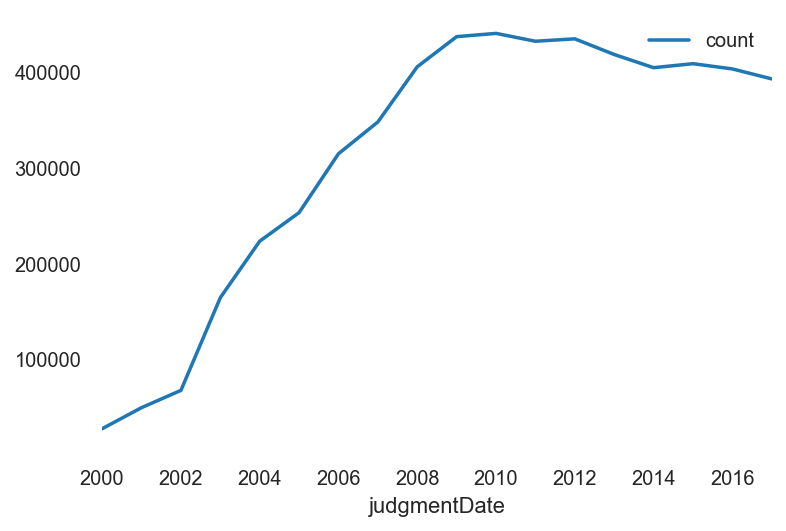

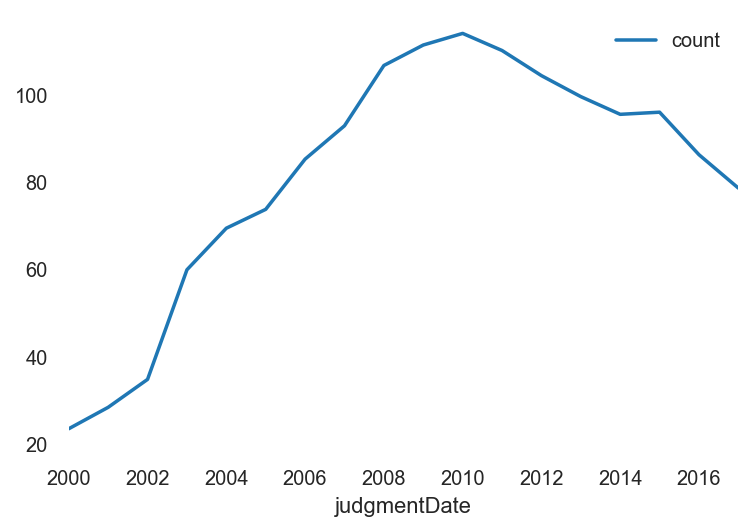

In [102]:
#df.plot.hist()     histogram
#df.plot.bar()      bar chart
#df.plot.barh()     horizontal bar chart
#df.plot.line()     line chart
#df.plot.area()     area chart
#df.plot.scatter()  scatter plot
#df.plot.box()      box plot
#df.plot.kde()      kde plot
#df.plot.hexbin()   hexagonal bin plot
#df.plot.pie()      pie chart

#df_count_day_month_type_teeste = df_count_day_type.transpose()

display(df_count_day_month_type_teeste[['count']].resample('Y').sum().head(3))

df_count_day_month_type_teeste[['count']].resample('Y').sum().plot()
df_count_day_month_type_teeste[['count']].resample('Y').mean().plot()

# SatsModels

In [132]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [122]:
df_t_day = df_count_day_type 
df_t_week = df_count_week_day_type 
df_t_YM = df_count_year_month_type 

In [123]:
df_t_day.index = pd.to_datetime(df_t_day['judgmentDate'])
#df_t_week.index = pd.to_datetime(df_t_week['weekDay'])
df_t_YM.index = pd.to_datetime(df_t_YM['yearMonth'])

print(df_t_day['judgmentDate'].count())
#print(df_t_week['weekDay'].count())
print(df_t_YM['yearMonth'].count())
display(df_t_day.head(3))
#display(df_t_week.head(3))
display(df_t_YM.head(3))
#print(df_t_day.index)
#print(df_t_week.index)
#print(df_t_YM.index)

63765
7455


judgmentDate                   type  count  weekDay   weekType  \
judgmentDate                                                                  
2000-01-03     2000-01-03  Agravo de Instrumento      2        0  DiaSemana   
2000-01-06     2000-01-06  Agravo de Instrumento      1        3  DiaSemana   
2000-01-10     2000-01-10  Agravo de Instrumento      2        0  DiaSemana   

              Dia  Mes   Ano  Feriado  
judgmentDate                           
2000-01-03      3    1  2000    False  
2000-01-06      6    1  2000    False  
2000-01-10     10    1  2000    False

yearMonth                   type  count
yearMonth                                           
2000-01-01  2000-01-01  Agravo de Instrumento     12
2000-02-01  2000-02-01        Ação Rescisória      1
2000-02-01  2000-02-01                 Agravo      4

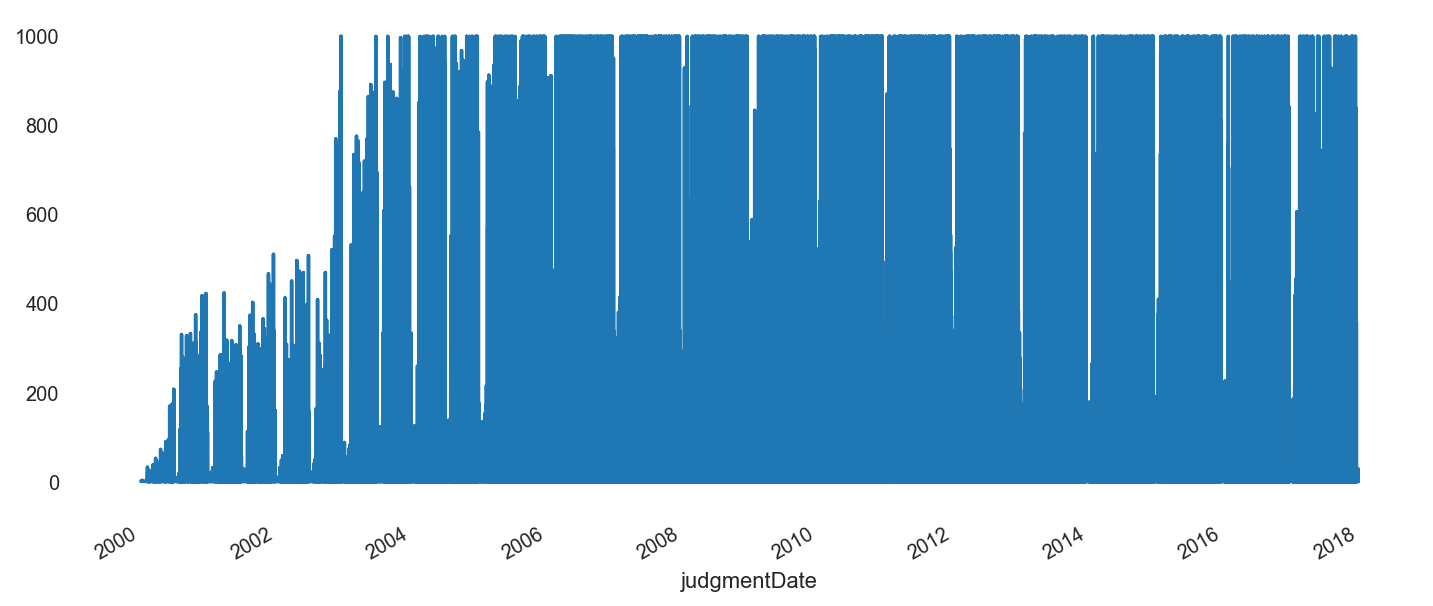

In [129]:
df_t_day['count'].plot.line(figsize=(12,5))

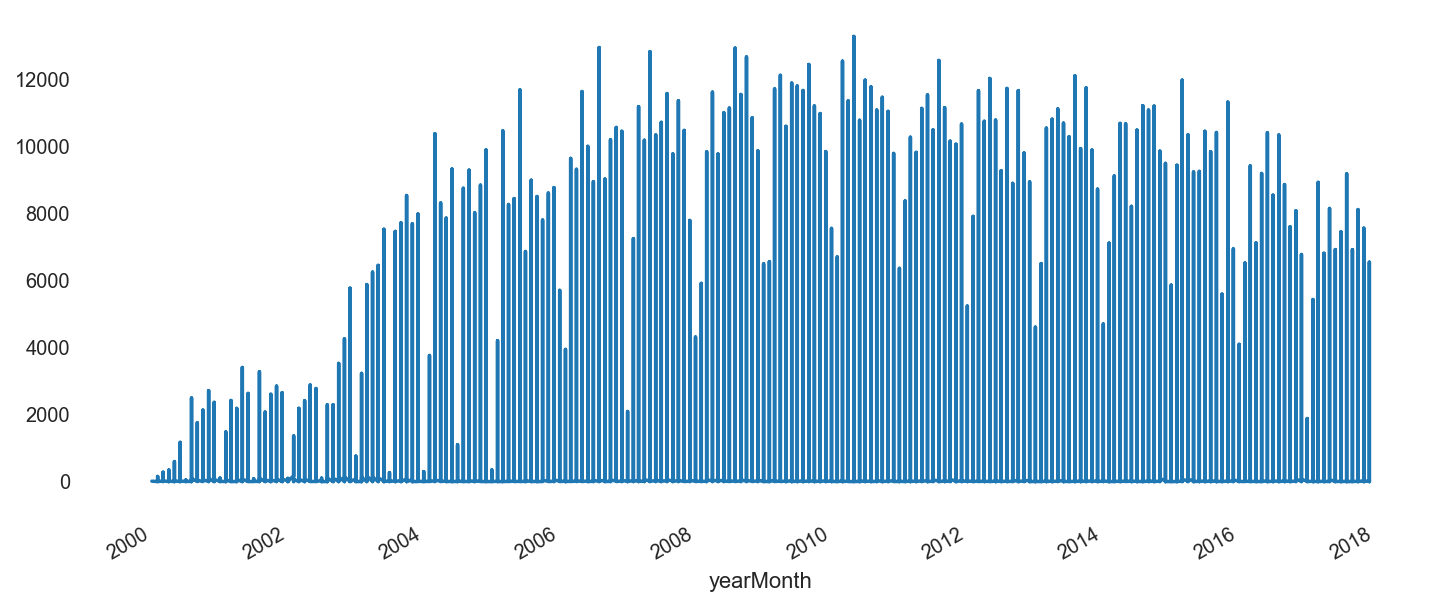

In [130]:
df_t_YM['count'].plot.line(figsize=(12,5))

In [147]:
from statsmodels.tsa.filters.hp_filter import hpfilter
year_cycle,year_trend = hpfilter(df_t_YM['count'],lamb=1600)
day_cycle,day_trend = hpfilter(df_t_day['count'],lamb=1600)

In [148]:
df_t_day['trend'] = day_trend
df_t_YM['trend'] = year_trend

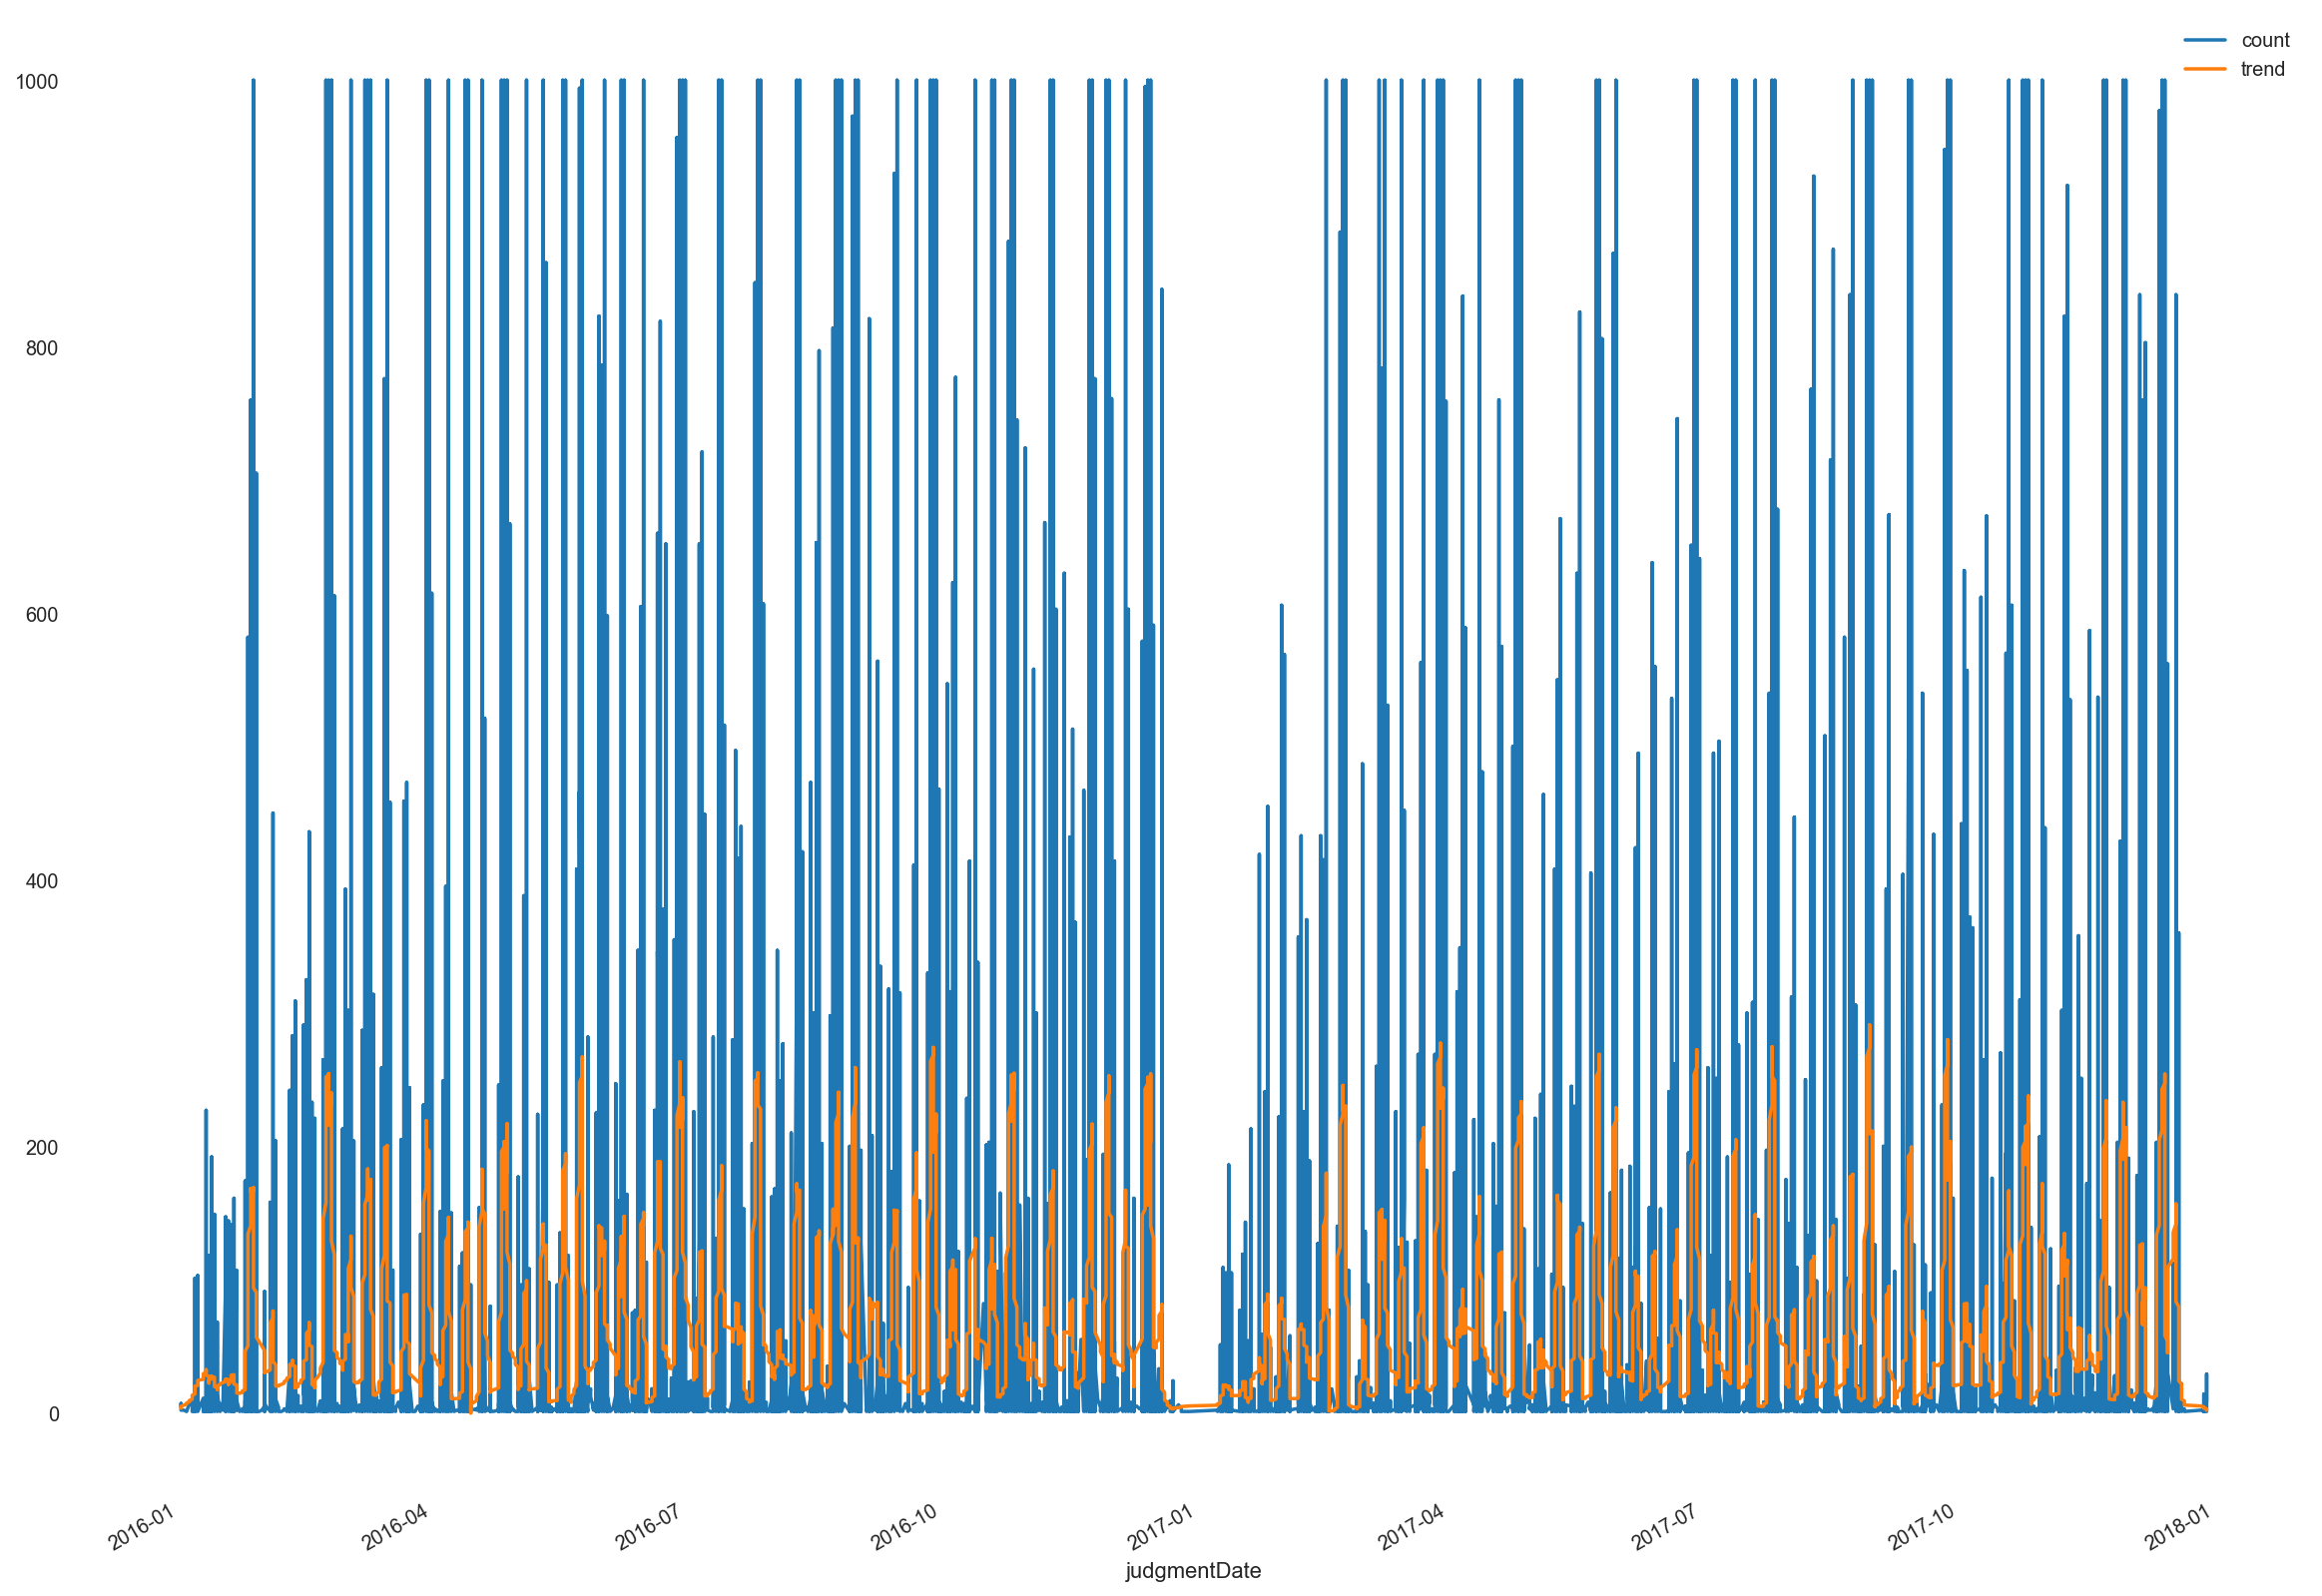

In [157]:
df_t_day[['count','trend']]['2016-01-01':].plot.line(figsize=(20,15))

In [170]:
display(df_t_YM.head(3))
df_t_YM[['count','trend']]['2017-11-01':].plot.bar(figsize=(25,10))

yearMonth                   type  count      trend
yearMonth                                                      
2000-01-01  2000-01-01  Agravo de Instrumento     12  17.552947
2000-02-01  2000-02-01        Ação Rescisória      1  20.110116
2000-02-01  2000-02-01                 Agravo      4  22.663814